In [38]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import viz # curriculum example visualizations

In [18]:
men = np.random.choice([1, 2, 3, 4], size = [10000, 6])

In [29]:
mage1d = men.sum(axis = 1)
x = mage1d.reshape(10000, 1)

In [30]:
mage2a = np.random.choice([1, 2, 3, 4, 5, 6], size = [10000, 4])
mage2a

array([[4, 2, 1, 3],
       [6, 6, 3, 6],
       [3, 4, 4, 1],
       ...,
       [5, 1, 6, 5],
       [4, 5, 5, 3],
       [1, 1, 5, 6]])

In [31]:
attack2 = mage2a.sum(axis = 1)

In [32]:
y = attack2.reshape(10000, 1)

In [33]:
m2attack1 = np.append(x, y, axis = 1)

In [34]:
m2attack1

array([[12, 10],
       [13, 21],
       [15, 12],
       ...,
       [15, 17],
       [13, 17],
       [11, 13]])

In [35]:
pd.DataFrame(m2attack1).apply(lambda hgh: hgh[0] < hgh[1], axis = 1).mean() 
# probability that mage 2 will beat mage 1


0.3703

In [36]:
pd.DataFrame(m2attack1).apply(lambda hgh: hgh[0] > hgh[1], axis = 1).mean()
##

0.5415

# rvs - random value generation


In [40]:
dice_distribution = stats.randint(1,7)

In [50]:
dice_distribution.rvs(5)

array([2, 6, 6, 2, 1])

In [53]:
##for a matrix, use dimension (row, col)
dice_distribution.rvs((5,5))
## rvs is a way to get a random sequence of numbers

array([[4, 1, 1, 3, 4],
       [4, 3, 6, 4, 1],
       [6, 5, 6, 3, 5],
       [1, 6, 4, 1, 6],
       [3, 4, 2, 5, 3]])

In [59]:
n = 10000000
x = dice_distribution.rvs(n)

In [60]:
x

array([2, 5, 5, ..., 2, 6, 5])

Text(0.5, 1.0, 'Outcome of 10,000,000 Dice Rolls')

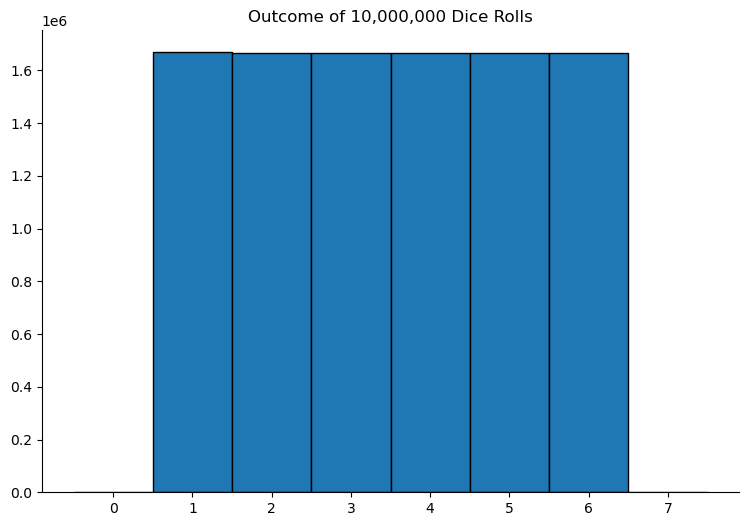

In [61]:
plt.hist(x, bins = range (0,9), align = 'left', width = 1, edgecolor = 'black')
plt.title(f'Outcome of {n:,} Dice Rolls')

In [62]:
## use pmf to find the probability that a roll = 3
dice_distribution.pmf(3)

0.16666666666666666